# Building Logistic Regression model on our data set.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import os

warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

In [2]:
df1=pd.read_csv('Customer_and_bank details_p1.csv')
df2=pd.read_csv('Customer_campaign_details_p1.csv')
df3=pd.read_csv('Customer_Postal_Code_details.csv')
df4=pd.read_csv('Customer_Response_data_p1.csv')
df5=pd.read_csv('Customer_social_economic_data_p1.csv')
region=pd.read_csv("Region_code_master.csv")
city=pd.read_csv("City_Master.csv")
state=pd.read_csv("State_Master.csv")
df3=df3.rename({'customer_id':'Customer_id'},axis='columns')
df6=pd.merge(df1,df2, on='Customer_id', how='inner')
df7=pd.merge(df4,df5, on='Customer_id', how='inner')
df8=pd.merge(df6,df7, on='Customer_id', how='inner')
df=pd.merge(df8,df3,on='Customer_id' ,how='inner')
df=pd.merge(df,state,on='State_Code')
df=pd.merge(df,city,on='City_Code')
df=df.drop(['State_Code_y','Region_Code_y'],axis=1)
df=df.rename({'Region_Code_x':'Region_Code','State_Code_x':'State_Code','y':'Response_Target'},axis=1)
df1=pd.merge(state,region,on="Region_Code")
df=pd.merge(df,df1,on='State_Code')
df=df.drop(['State_Name_y','Region_Code_y'],axis=1)
df_data=df.drop(['Customer_id','Region_Code_x','State_Code','City_Code','Postal Code'],axis=1)
df_data['Response_Target']=df_data['Response_Target'].map(lambda x:1 if x=='yes' else 0)


### Data Preprocessing(Missing values, Outlier,etc):

In [3]:
df = df.drop(['Customer_id','Postal Code'],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37084 entries, 0 to 37083
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              37084 non-null  int64  
 1   job              37084 non-null  object 
 2   marital          37084 non-null  object 
 3   education        37084 non-null  object 
 4   default          37084 non-null  object 
 5   housing          37084 non-null  object 
 6   loan             37084 non-null  object 
 7   Region_Code_x    37084 non-null  object 
 8   State_Code       37084 non-null  object 
 9   City_Code        37084 non-null  object 
 10  contact          37084 non-null  object 
 11  month            37084 non-null  object 
 12  day_of_week      37084 non-null  object 
 13  duration         37084 non-null  int64  
 14  campaign         37084 non-null  int64  
 15  pdays            37084 non-null  int64  
 16  previous         37084 non-null  int64  
 17  poutcome    

In [5]:
def con(x):
    if x==999:
        return 'no'
    else:
        return 'yes'

df['pdays']=df['pdays'].map(con)

In [6]:
def get_duration(x):
    if 0<x<200:
        return 'LOW'
    elif 200<=x<700:
        return 'MEDIUM'
    else:
        return 'HIGH'
df['duration']=df.duration.map(get_duration)

In [7]:
df_data = df.copy()
age_median=df_data.age.median()
campaign_median=df_data.campaign.median()

df_data['age'].loc[(df_data['age']>df_data.age.quantile(0.99))]=age_median
df_data['campaign'].loc[(df_data['campaign']>df_data.campaign.quantile(0.99))]=campaign_median

In [8]:
df_data

,age,job,marital,education,default,housing,loan,Region_Code_x,State_Code,City_Code,...,poutcome,Response_Target,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,State_Name_x,City_Name,Region_Name
0,56,services,married,high.school,no,no,yes,3,S1,C1,...,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
1,45,services,married,basic.9y,unknown,no,no,3,S1,C1,...,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
2,32,admin.,single,university.degree,no,no,no,3,S1,C1,...,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
3,36,services,married,high.school,no,no,no,3,S1,C1,...,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
4,31,blue-collar,married,basic.9y,no,no,no,3,S1,C1,...,nonexistent,no,1.1,93.994,-36.4,4.856,5191.0,Kentucky,Henderson,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37,housemaid,divorced,high.school,no,no,no,1,S47,C403,...,nonexistent,no,-3.4,92.379,-29.8,0.753,5017.5,North Dakota,Fargo,Central
37080,58,unknown,married,basic.4y,no,yes,no,4,S48,C459,...,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,Wyoming,Cheyenne,West
37081,43,unemployed,divorced,basic.9y,no,no,no,4,S48,C459,...,nonexistent,no,1.4,93.918,-42.7,4.962,5228.1,Wyoming,Cheyenne,West
37082,37,admin.,single,high.school,no,no,no,4,S48,C459,...,failure,no,-1.8,93.075,-47.1,1.410,5099.1,Wyoming,Cheyenne,West


In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37084 entries, 0 to 37083
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              37084 non-null  int64  
 1   job              37084 non-null  object 
 2   marital          37084 non-null  object 
 3   education        37084 non-null  object 
 4   default          37084 non-null  object 
 5   housing          37084 non-null  object 
 6   loan             37084 non-null  object 
 7   Region_Code_x    37084 non-null  object 
 8   State_Code       37084 non-null  object 
 9   City_Code        37084 non-null  object 
 10  contact          37084 non-null  object 
 11  month            37084 non-null  object 
 12  day_of_week      37084 non-null  object 
 13  duration         37084 non-null  object 
 14  campaign         37084 non-null  int64  
 15  pdays            37084 non-null  object 
 16  previous         37084 non-null  int64  
 17  poutcome    

In [10]:
df=df_data.copy()

In [11]:

df.replace('unknown',np.NaN,inplace=True)
df.isnull().sum()

age                   0
job                 306
marital              72
education          1549
default            7700
housing             882
loan                882
Region_Code_x         0
State_Code            0
City_Code             0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
Response_Target       0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
State_Name_x          0
City_Name             0
Region_Name           0
dtype: int64

In [12]:
df['default']= df['default'].fillna('unknown')
for col in df.columns:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [13]:

df.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
Region_Code_x      0
State_Code         0
City_Code          0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
Response_Target    0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
State_Name_x       0
City_Name          0
Region_Name        0
dtype: int64

In [14]:
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    df.loc[df['education'] == i, 'education'] = "middle.school"

df['education'].value_counts()

university.degree      12520
middle.school          11260
high.school             8542
professional.course     4746
illiterate                16
Name: education, dtype: int64

In [15]:
categorical = df.select_dtypes(include=['object'])
categorical

,job,marital,education,default,housing,loan,Region_Code_x,State_Code,City_Code,contact,month,day_of_week,duration,pdays,poutcome,Response_Target,State_Name_x,City_Name,Region_Name
0,services,married,high.school,no,no,yes,3,S1,C1,telephone,may,mon,MEDIUM,no,nonexistent,no,Kentucky,Henderson,South
1,services,married,middle.school,unknown,no,no,3,S1,C1,telephone,may,mon,LOW,no,nonexistent,no,Kentucky,Henderson,South
2,admin.,single,university.degree,no,no,no,3,S1,C1,telephone,may,tue,MEDIUM,no,nonexistent,no,Kentucky,Henderson,South
3,services,married,high.school,no,no,no,3,S1,C1,telephone,may,tue,LOW,no,nonexistent,no,Kentucky,Henderson,South
4,blue-collar,married,middle.school,no,no,no,3,S1,C1,telephone,may,wed,LOW,no,nonexistent,no,Kentucky,Henderson,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,housemaid,divorced,high.school,no,no,no,1,S47,C403,cellular,sep,wed,LOW,no,nonexistent,no,North Dakota,Fargo,Central
37080,admin.,married,middle.school,no,yes,no,4,S48,C459,telephone,may,wed,MEDIUM,no,nonexistent,no,Wyoming,Cheyenne,West
37081,unemployed,divorced,middle.school,no,no,no,4,S48,C459,cellular,jul,mon,LOW,no,nonexistent,no,Wyoming,Cheyenne,West
37082,admin.,single,high.school,no,no,no,4,S48,C459,cellular,apr,thu,MEDIUM,no,failure,no,Wyoming,Cheyenne,West


In [16]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
df['month']= df['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
df['day_of_week']= df['day_of_week'].map(day_dict)

In [17]:
dictionary={'yes':1,'no':0,'unknown':-1}
df['housing']=df['housing'].map(dictionary)
df['default']=df['default'].map(dictionary)
df['loan']=df['loan'].map(dictionary)

In [18]:
df

,age,job,marital,education,default,housing,loan,Region_Code_x,State_Code,City_Code,...,poutcome,Response_Target,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,State_Name_x,City_Name,Region_Name
0,56,services,married,high.school,0,0,1,3,S1,C1,...,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
1,45,services,married,middle.school,-1,0,0,3,S1,C1,...,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
2,32,admin.,single,university.degree,0,0,0,3,S1,C1,...,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
3,36,services,married,high.school,0,0,0,3,S1,C1,...,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
4,31,blue-collar,married,middle.school,0,0,0,3,S1,C1,...,nonexistent,no,1.1,93.994,-36.4,4.856,5191.0,Kentucky,Henderson,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37,housemaid,divorced,high.school,0,0,0,1,S47,C403,...,nonexistent,no,-3.4,92.379,-29.8,0.753,5017.5,North Dakota,Fargo,Central
37080,58,admin.,married,middle.school,0,1,0,4,S48,C459,...,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,Wyoming,Cheyenne,West
37081,43,unemployed,divorced,middle.school,0,0,0,4,S48,C459,...,nonexistent,no,1.4,93.918,-42.7,4.962,5228.1,Wyoming,Cheyenne,West
37082,37,admin.,single,high.school,0,0,0,4,S48,C459,...,failure,no,-1.8,93.075,-47.1,1.410,5099.1,Wyoming,Cheyenne,West


In [19]:
cat=df.select_dtypes(include=['object']).columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat:
    df[col]=le.fit_transform(df[col])

In [20]:
df

,age,job,marital,education,default,housing,loan,Region_Code_x,State_Code,City_Code,...,poutcome,Response_Target,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,State_Name_x,City_Name,Region_Name
0,56,7,1,0,0,0,1,2,0,0,...,1,0,1.1,93.994,-36.4,4.857,5191.0,15,194,2
1,45,7,1,2,-1,0,0,2,0,0,...,1,0,1.1,93.994,-36.4,4.857,5191.0,15,194,2
2,32,0,2,4,0,0,0,2,0,0,...,1,0,1.1,93.994,-36.4,4.857,5191.0,15,194,2
3,36,7,1,0,0,0,0,2,0,0,...,1,0,1.1,93.994,-36.4,4.857,5191.0,15,194,2
4,31,1,1,2,0,0,0,2,0,0,...,1,0,1.1,93.994,-36.4,4.856,5191.0,15,194,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37,3,0,0,0,0,0,0,41,338,...,1,0,-3.4,92.379,-29.8,0.753,5017.5,32,148,0
37080,58,0,1,2,0,1,0,3,42,399,...,1,0,1.1,93.994,-36.4,4.857,5191.0,48,79,3
37081,43,10,0,2,0,0,0,3,42,399,...,1,0,1.4,93.918,-42.7,4.962,5228.1,48,79,3
37082,37,0,2,0,0,0,0,3,42,399,...,0,0,-1.8,93.075,-47.1,1.410,5099.1,48,79,3


## Model Builidng:

In [21]:
X = df.drop('Response_Target',axis=1)

In [22]:
y = df.Response_Target

In [23]:
X.head()

,age,job,marital,education,default,housing,loan,Region_Code_x,State_Code,City_Code,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,State_Name_x,City_Name,Region_Name
0,56,7,1,0,0,0,1,2,0,0,...,0,1,1.1,93.994,-36.4,4.857,5191.0,15,194,2
1,45,7,1,2,-1,0,0,2,0,0,...,0,1,1.1,93.994,-36.4,4.857,5191.0,15,194,2
2,32,0,2,4,0,0,0,2,0,0,...,0,1,1.1,93.994,-36.4,4.857,5191.0,15,194,2
3,36,7,1,0,0,0,0,2,0,0,...,0,1,1.1,93.994,-36.4,4.857,5191.0,15,194,2
4,31,1,1,2,0,0,0,2,0,0,...,0,1,1.1,93.994,-36.4,4.856,5191.0,15,194,2


In [24]:
y.unique()

array([0, 1])

##### Feature Scaling:

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X)
Stand_df = sc.transform(X)
df_Scaled = pd.DataFrame(Stand_df,columns=X.columns)
df_Scaled.head()

,age,job,marital,education,default,housing,loan,Region_Code_x,State_Code,City_Code,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,State_Name_x,City_Name,Region_Name
0,1.675998,0.947357,-0.281038,-1.549998,0.511654,-1.100664,2.360934,0.364062,-1.214498,-1.294786,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
1,0.546807,0.947357,-0.281038,-0.226395,-1.953165,-1.100664,-0.423561,0.364062,-1.214498,-1.294786,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
2,-0.787691,-1.022702,1.378254,1.097209,0.511654,-1.100664,-0.423561,0.364062,-1.214498,-1.294786,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
3,-0.377076,0.947357,-0.281038,-1.549998,0.511654,-1.100664,-0.423561,0.364062,-1.214498,-1.294786,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
4,-0.890344,-0.741265,-0.281038,-0.226395,0.511654,-1.100664,-0.423561,0.364062,-1.214498,-1.294786,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.711862,0.331618,-0.470397,-0.619294,0.367676


In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(df_Scaled, y, train_size=0.7, test_size=0.3, random_state=100)

#### Creating first model: 
    Assessing the model with StatsModels

In [27]:
x_train_sm = sm.add_constant(xtrain)
logm1 = sm.GLM(ytrain,x_train_sm, family=sm.families.Binomial())
model1 = logm1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Response_Target   No. Observations:                25958
Model:                            GLM   Df Residuals:                    25931
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7176.9
Date:                Sun, 14 Nov 2021   Deviance:                       14354.
Time:                        21:27:59   Pearson chi2:                 2.58e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.5128      0.027    -92.956      0.000      -2.566      -2.460
age                0.0202      0.023      0.873      0.383      -0.025       0.066
job                0.0219      0.022      0.992      0.321      -0.021       0.065
marital            0.0433      0.024      1.791      0.073      -0.004       0.091
education          0.0575      0.022      2.598      0.009       0.014       0.101
default            0.1590      0.029      5.435      0.000       0.102       0.216
housing           -0.0279      0.022     -1.252      0.210      -0.072       0.016
loan              -0.0154      0.023     -0.682      0.495      -0.060       0.029
Region_Code_x      0.4165      0.241      1.731      0.083      -0.055       0.888
State_Code         0.0081      0.026      0.305      0.761      -0.044       0.060
City_Code          0.0103      0.024      0.437      0.662      -0.036       0.056
contact           -0.5727      0.038    -15.226      0.000      -0.646      -0.499
month             -0.1597      0.030     -5.255      0.000      -0.219      -0.100
day_of_week        0.0856      0.022      3.854      0.000       0.042       0.129
duration          -0.2595      0.022    -11.888      0.000      -0.302      -0.217
campaign          -0.0797      0.027     -2.965      0.003      -0.132      -0.027
pdays              0.2088      0.035      5.912      0.000       0.140       0.278
previous          -0.0522      0.033     -1.572      0.116      -0.117       0.013
poutcome           0.1850      0.033      5.652      0.000       0.121       0.249
emp.var.rate      -1.4434      0.126    -11.454      0.000      -1.690      -1.196
cons.price.idx     0.7025      0.072      9.703      0.000       0.561       0.844
cons.conf.idx      0.2156      0.033      6.544      0.000       0.151       0.280
euribor3m          0.6540      0.210      3.121      0.002       0.243       1.065
nr.employed       -0.3720      0.141     -2.635      0.008      -0.649      -0.095
State_Name_x       0.0288      0.029      1.002      0.317      -0.028       0.085
City_Name         -0.0629      0.024     -2.675      0.007      -0.109      -0.017
Region_Name       -0.3616      0.241     -1.499      0.134      -0.834       0.111
==================================================================================
"""

In [28]:
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Generalized linear model
=================================================================
Model:              GLM              AIC:            14407.8212  
Link Function:      logit            BIC:            -249214.9599
Dependent Variable: Response_Target  Log-Likelihood: -7176.9     
Date:               2021-11-14 21:27 LL-Null:        -9158.0     
No. Observations:   25958            Deviance:       14354.      
Df Model:           26               Pearson chi2:   2.58e+04    
Df Residuals:       25931            Scale:          1.0000      
Method:             IRLS                                         
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            -2.5128   0.0270 -92.9563 0.0000 -2.5658 -2.4598
age               0.0202   0.0231   0.8733 0.3825 -0.0251  0.0655
job               0.0219   0.0221   0.9918 0.3213 -0.0214  0.0652
marital           0.0433   0.0242   1.7915 0.0732 -0.0041  0.0907
education         0.0575   0.0221   2.5975 0.0094  0.0141  0.1009
default           0.1590   0.0293   5.4351 0.0000  0.1017  0.2163
housing          -0.0279   0.0223  -1.2524 0.2104 -0.0716  0.0158
loan             -0.0154   0.0225  -0.6821 0.4952 -0.0595  0.0288
Region_Code_x     0.4165   0.2406   1.7311 0.0834 -0.0551  0.8880
State_Code        0.0081   0.0265   0.3048 0.7605 -0.0438  0.0599
City_Code         0.0103   0.0235   0.4373 0.6619 -0.0358  0.0564
contact          -0.5727   0.0376 -15.2263 0.0000 -0.6464 -0.4989
month            -0.1597   0.0304  -5.2546 0.0000 -0.2193 -0.1001
day_of_week       0.0856   0.0222   3.8545 0.0001  0.0421  0.1291
duration         -0.2595   0.0218 -11.8876 0.0000 -0.3023 -0.2167
campaign         -0.0797   0.0269  -2.9648 0.0030 -0.1324 -0.0270
pdays             0.2088   0.0353   5.9115 0.0000  0.1396  0.2781
previous         -0.0522   0.0332  -1.5720 0.1160 -0.1173  0.0129
poutcome          0.1850   0.0327   5.6519 0.0000  0.1209  0.2492
emp.var.rate     -1.4434   0.1260 -11.4537 0.0000 -1.6904 -1.1964
cons.price.idx    0.7025   0.0724   9.7032 0.0000  0.5606  0.8444
cons.conf.idx     0.2156   0.0329   6.5436 0.0000  0.1510  0.2802
euribor3m         0.6540   0.2096   3.1207 0.0018  0.2432  1.0647
nr.employed      -0.3720   0.1412  -2.6353 0.0084 -0.6487 -0.0953
State_Name_x      0.0288   0.0288   1.0016 0.3166 -0.0276  0.0852
City_Name        -0.0629   0.0235  -2.6746 0.0075 -0.1090 -0.0168
Region_Name      -0.3616   0.2412  -1.4992 0.1338 -0.8344  0.1111
=================================================================

"""

In [29]:
y_train_pred = model1.predict(x_train_sm)
y_train_pred[:10]

6732     0.031127
10428    0.033737
19783    0.043390
26708    0.857722
2516     0.037641
27644    0.034269
21732    0.029267
19687    0.039117
26931    0.035065
19059    0.068356
dtype: float64

In [30]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03112673, 0.03373666, 0.04339034, 0.8577219 , 0.03764131,
       0.03426926, 0.02926664, 0.03911725, 0.03506478, 0.06835622])

##### Creating the dataframe with the actual subscription flag and the predicted probabilities

In [31]:
y_train_pred_final = pd.DataFrame({'Sub':ytrain.values,'Sub_prob':y_train_pred})
y_train_pred_final['Cust_id'] = ytrain.index
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.031127,6732
1,0,0.033737,10428
2,0,0.043390,19783
3,1,0.857722,26708
4,0,0.037641,2516
5,0,0.034269,27644
6,0,0.029267,21732
7,0,0.039117,19687
8,0,0.035065,26931
9,0,0.068356,19059


##### Creating new column 'predict' with 1 if Sub_prob > 0.5 else 0

In [32]:
y_train_pred_final['predict'] = y_train_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
0,0,0.031127,6732,0
1,0,0.033737,10428,0
2,0,0.043390,19783,0
3,1,0.857722,26708,1
4,0,0.037641,2516,0
5,0,0.034269,27644,0
6,0,0.029267,21732,0
7,0,0.039117,19687,0
8,0,0.035065,26931,0
9,0,0.068356,19059,0


In [33]:
confusion = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.predict)
confusion

array([[22628,   396],
       [ 2282,   652]], dtype=int64)

##### Confusion Matrix
Actual/Predicted|Non Sub|Sub
----------------|-------|---
**Non Sub**|22628|396
**Sub**|2282|652

In [34]:
print(metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.predict))

0.8968333461745898


##### But we need to check the p-values as well from the StatsModel to proceed further.

In [35]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Response_Target   No. Observations:                25958
Model:                            GLM   Df Residuals:                    25931
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7176.9
Date:                Sun, 14 Nov 2021   Deviance:                       14354.
Time:                        21:28:03   Pearson chi2:                 2.58e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.5128      0.027    -92.956      0.000      -2.566      -2.460
age                0.0202      0.023      0.873      0.383      -0.025       0.066
job                0.0219      0.022      0.992      0.321      -0.021       0.065
marital            0.0433      0.024      1.791      0.073      -0.004       0.091
education          0.0575      0.022      2.598      0.009       0.014       0.101
default            0.1590      0.029      5.435      0.000       0.102       0.216
housing           -0.0279      0.022     -1.252      0.210      -0.072       0.016
loan              -0.0154      0.023     -0.682      0.495      -0.060       0.029
Region_Code_x      0.4165      0.241      1.731      0.083      -0.055       0.888
State_Code         0.0081      0.026      0.305      0.761      -0.044       0.060
City_Code          0.0103      0.024      0.437      0.662      -0.036       0.056
contact           -0.5727      0.038    -15.226      0.000      -0.646      -0.499
month             -0.1597      0.030     -5.255      0.000      -0.219      -0.100
day_of_week        0.0856      0.022      3.854      0.000       0.042       0.129
duration          -0.2595      0.022    -11.888      0.000      -0.302      -0.217
campaign          -0.0797      0.027     -2.965      0.003      -0.132      -0.027
pdays              0.2088      0.035      5.912      0.000       0.140       0.278
previous          -0.0522      0.033     -1.572      0.116      -0.117       0.013
poutcome           0.1850      0.033      5.652      0.000       0.121       0.249
emp.var.rate      -1.4434      0.126    -11.454      0.000      -1.690      -1.196
cons.price.idx     0.7025      0.072      9.703      0.000       0.561       0.844
cons.conf.idx      0.2156      0.033      6.544      0.000       0.151       0.280
euribor3m          0.6540      0.210      3.121      0.002       0.243       1.065
nr.employed       -0.3720      0.141     -2.635      0.008      -0.649      -0.095
State_Name_x       0.0288      0.029      1.002      0.317      -0.028       0.085
City_Name         -0.0629      0.024     -2.675      0.007      -0.109      -0.017
Region_Name       -0.3616      0.241     -1.499      0.134      -0.834       0.111
==================================================================================
"""

##### We can see that some of the variables here have high p-values i.e. greater than 0.05. So we need to drop those features before moving ahead

In [39]:
xtrain1 = sm.add_constant(xtrain)
xtest1 = sm.add_constant(xtest)
while max(model1.pvalues)>0.05:
    for x,y in zip(model1.pvalues,xtrain.columns):
        if x>0.05:
            xtrain1 =   xtrain1.drop(y,axis=1)
            xtest1 = xtest1.drop(y,axis=1)
            model1 = sm.GLM(ytrain,xtrain1,family=sm.families.Binomial()).fit()
          
    break

In [40]:
finalmodel = model1
finalmodel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Response_Target   No. Observations:                25958
Model:                            GLM   Df Residuals:                    25942
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7185.3
Date:                Sun, 14 Nov 2021   Deviance:                       14371.
Time:                        21:28:21   Pearson chi2:                 2.58e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.5097      0.027    -93.009      0.000      -2.563      -2.457
education          0.0593      0.022      2.682      0.007       0.016       0.103
default            0.1600      0.029      5.523      0.000       0.103       0.217
contact           -0.5699      0.038    -15.190      0.000      -0.643      -0.496
month             -0.1611      0.030     -5.312      0.000      -0.221      -0.102
day_of_week        0.0843      0.022      3.802      0.000       0.041       0.128
duration          -0.2613      0.022    -11.976      0.000      -0.304      -0.218
campaign          -0.0800      0.027     -2.979      0.003      -0.133      -0.027
pdays              0.1627      0.020      8.145      0.000       0.124       0.202
poutcome           0.2241      0.022     10.021      0.000       0.180       0.268
emp.var.rate      -1.4549      0.126    -11.564      0.000      -1.702      -1.208
cons.price.idx     0.7032      0.072      9.735      0.000       0.562       0.845
cons.conf.idx      0.2182      0.033      6.632      0.000       0.154       0.283
euribor3m          0.6511      0.209      3.112      0.002       0.241       1.061
nr.employed       -0.3577      0.141     -2.539      0.011      -0.634      -0.082
City_Name         -0.0476      0.022     -2.160      0.031      -0.091      -0.004
==================================================================================
"""

In [41]:
y_train_pred = finalmodel.predict(xtrain1)
y_train_pred[:10]

6732     0.028679
10428    0.029483
19783    0.047700
26708    0.857216
2516     0.034168
27644    0.032475
21732    0.028154
19687    0.038889
26931    0.038946
19059    0.065951
dtype: float64

In [42]:
yy_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

6732     0.028679
10428    0.029483
19783    0.047700
26708    0.857216
2516     0.034168
27644    0.032475
21732    0.028154
19687    0.038889
26931    0.038946
19059    0.065951
dtype: float64

In [43]:
y_train_pred_final = pd.DataFrame({'Sub':ytrain.values,'Sub_prob':y_train_pred})
y_train_pred_final['Cust_id'] = ytrain.index
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id
6732,0,0.028679,6732
10428,0,0.029483,10428
19783,0,0.047700,19783
26708,1,0.857216,26708
2516,0,0.034168,2516
27644,0,0.032475,27644
21732,0,0.028154,21732
19687,0,0.038889,19687
26931,0,0.038946,26931
19059,0,0.065951,19059


In [44]:
y_train_pred_final['predict'] = y_train_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
6732,0,0.028679,6732,0
10428,0,0.029483,10428,0
19783,0,0.047700,19783,0
26708,1,0.857216,26708,1
2516,0,0.034168,2516,0
27644,0,0.032475,27644,0
21732,0,0.028154,21732,0
19687,0,0.038889,19687,0
26931,0,0.038946,26931,0
19059,0,0.065951,19059,0


In [45]:
confusion = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.predict)
print(confusion)

[[22638   386]
 [ 2297   637]]


##### Confusion Matrix
Actual/Predicted|Non Sub|Sub
----------------|-------|---
**Non Sub**|22638|389
**Sub**|2295|639

In [46]:
print(metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.predict))

0.8966407273287619


#### We see a very little change in accuracy after dropping the insignificant columns.

---
## Metrics beyond simply accuracy

In [47]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [48]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.2171097477845944

In [49]:
# Let us calculate specificity
TN/float(TN+FP)

0.9832348853370396

In [50]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/float(TN+FP)

0.01676511466296039

In [51]:
# positive predictive value 
TP/float(TP+FP)

0.6226783968719453

In [52]:
# Negative predictive value
TN/float(TN+FN)

0.9078804892721075

### Step 7: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [53]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC_AUC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Sub, y_train_pred_final.Sub_prob,drop_intermediate=False)

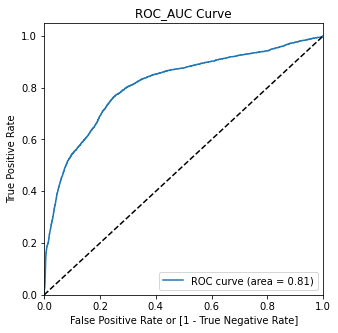

In [55]:
draw_roc(y_train_pred_final.Sub, y_train_pred_final.Sub_prob)

---
## Precision and Recall

In [56]:
# Looking at the confusion matrix again
confusion

array([[22638,   386],
       [ 2297,   637]], dtype=int64)

##### Precision
TP / TP + FP

In [57]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6226783968719453

##### Recall
TP / TP + FN

In [58]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.2171097477845944

---
#### Using sklearn utilities for finding precision and recall

In [59]:
precision_score(y_train_pred_final.Sub, y_train_pred_final.predict)

0.6226783968719453

In [60]:
recall_score(y_train_pred_final.Sub, y_train_pred_final.predict)

0.2171097477845944

---
## Making predictions on Test data

In [61]:
xtest.head()

,const,age,job,marital,education,default,housing,loan,Region_Code_x,State_Code,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,State_Name_x,City_Name,Region_Name
35287,1.0,1.265383,1.510230,-0.281038,-1.549998,0.511654,0.908542,-0.423561,-1.352079,0.013336,...,-0.34899,0.191987,0.839612,1.536642,-0.280143,0.717052,0.845499,0.046002,1.033921,-1.353033
24009,1.0,-0.274422,-1.022702,1.378254,1.097209,0.511654,0.908542,2.360934,-0.494008,-1.146285,...,-0.34899,0.191987,-0.116426,-0.650106,-0.323415,0.230302,0.398104,0.885150,0.674527,-0.492679
30612,1.0,1.060076,-1.022702,1.378254,1.097209,-1.953165,-1.100664,2.360934,1.222133,1.786873,...,-0.34899,0.191987,0.839612,-0.228314,0.953094,0.773571,0.845499,1.466099,1.235182,1.228031
3549,1.0,-0.171769,-1.022702,1.378254,1.097209,0.511654,0.908542,2.360934,-0.494008,-0.054877,...,-0.34899,0.191987,0.839612,-0.228314,0.953094,0.774724,0.845499,0.691500,-0.288651,-0.492679
5299,1.0,0.238846,0.947357,-0.281038,0.435407,0.511654,-1.100664,-0.423561,1.222133,-0.464155,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.713015,0.331618,-1.244996,-0.101766,1.228031


In [62]:
x_test_sm = sm.add_constant(xtest)

---
##### Making predictions on the test data 

In [63]:
logm_test = sm.GLM(ytest,x_test_sm, family=sm.families.Binomial())
res1 = logm_test.fit()
res1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Response_Target   No. Observations:                11126
Model:                            GLM   Df Residuals:                    11099
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3181.5
Date:                Sun, 14 Nov 2021   Deviance:                       6363.1
Time:                        21:28:36   Pearson chi2:                 1.08e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.4400      0.039    -61.864      0.000      -2.517      -2.363
age                0.0023      0.035      0.066      0.947      -0.066       0.070
job                0.0495      0.033      1.491      0.136      -0.016       0.114
marital            0.0473      0.036      1.298      0.194      -0.024       0.119
education          0.0295      0.033      0.889      0.374      -0.036       0.095
default            0.0697      0.041      1.684      0.092      -0.011       0.151
housing            0.0035      0.034      0.103      0.918      -0.062       0.069
loan              -0.0081      0.033     -0.241      0.809      -0.074       0.058
Region_Code_x      0.1834      0.376      0.488      0.625      -0.553       0.919
State_Code         0.0016      0.040      0.040      0.968      -0.077       0.080
City_Code         -0.0171      0.036     -0.481      0.630      -0.087       0.053
contact           -0.4122      0.054     -7.632      0.000      -0.518      -0.306
month             -0.0298      0.044     -0.675      0.500      -0.116       0.057
day_of_week        0.0115      0.033      0.347      0.728      -0.053       0.076
duration          -0.2321      0.033     -7.053      0.000      -0.297      -0.168
campaign          -0.1364      0.042     -3.262      0.001      -0.218      -0.054
pdays              0.1475      0.051      2.872      0.004       0.047       0.248
previous           0.0131      0.048      0.272      0.786      -0.081       0.107
poutcome           0.1506      0.048      3.145      0.002       0.057       0.244
emp.var.rate      -1.1512      0.193     -5.980      0.000      -1.528      -0.774
cons.price.idx     0.7080      0.105      6.764      0.000       0.503       0.913
cons.conf.idx      0.2657      0.047      5.630      0.000       0.173       0.358
euribor3m          0.0375      0.307      0.122      0.903      -0.564       0.639
nr.employed       -0.0826      0.201     -0.410      0.681      -0.477       0.312
State_Name_x      -0.0311      0.044     -0.708      0.479      -0.117       0.055
City_Name          0.0491      0.036      1.353      0.176      -0.022       0.120
Region_Name       -0.1911      0.376     -0.508      0.612      -0.929       0.546
==================================================================================
"""

In [64]:
y_test_pred = res1.predict(x_test_sm)
y_train_pred[:10]

6732     0.028679
10428    0.029483
19783    0.047700
26708    0.857216
2516     0.034168
27644    0.032475
21732    0.028154
19687    0.038889
26931    0.038946
19059    0.065951
dtype: float64

In [65]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [66]:
y_test_df = pd.DataFrame(ytest)

In [67]:
y_test_df['Cust_id'] = y_test_df.index

In [68]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [69]:
y_pred = pd.concat([y_test_df,y_pred_1],axis=1)

In [70]:
y_pred.head()

,Response_Target,Cust_id,0
0,0,35287,0.065112
1,0,24009,0.063365
2,0,30612,0.046673
3,0,3549,0.074334
4,0,5299,0.062609


In [71]:
y_pred.rename(columns={'Response_Target':'Sub',0:'Sub_prob'},inplace=True)

In [72]:

y_pred['final_predict'] = y_pred.Sub_prob.map(lambda x: 1 if x>0.25 else 0)

In [73]:
y_pred.head(20)

,Sub,Cust_id,Sub_prob,final_predict
0,0,35287,0.065112,0
1,0,24009,0.063365,0
2,0,30612,0.046673,0
3,0,3549,0.074334,0
4,0,5299,0.062609,0
5,0,34021,0.147757,0
6,0,32415,0.060704,0
7,0,18051,0.058196,0
8,0,25197,0.358109,1
9,0,20075,0.088607,0


In [74]:
# overall accuracy of the model on test data
metrics.accuracy_score(y_pred.Sub, y_pred.final_predict)

0.8759662052849182

In [75]:
confusion3 = metrics.confusion_matrix(y_pred.Sub, y_pred.final_predict)
confusion3

array([[9190,  662],
       [ 718,  556]], dtype=int64)

In [76]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [77]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.4364207221350079

In [78]:
# Let us calculate specificity
TN/float(TN+FP)

0.9328055217214779

## Using Sk-learn to build logistic regression model:
    Above we used the stats module to build the logistic regression model.
    Now we will use the sklearn module to do the same.

In [79]:
xtrain.drop('const',axis=1)


,age,job,marital,education,default,housing,loan,Region_Code_x,State_Code,City_Code,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,State_Name_x,City_Name,Region_Name
6732,1.060076,0.103046,1.378254,1.097209,0.511654,0.908542,-0.423561,1.222133,-0.464155,-0.669493,...,1.668462,-2.564367,-0.116426,-0.650106,-0.323415,0.306429,0.398104,-1.244996,-0.101766,1.228031
10428,-0.890344,1.510230,1.378254,-1.549998,0.511654,-1.100664,-0.423561,1.222133,-0.464155,1.521847,...,-0.348990,0.191987,0.839612,-0.228314,0.953094,0.775878,0.845499,-1.244996,1.127364,1.228031
19783,0.136192,1.510230,-1.940330,0.435407,0.511654,0.908542,-0.423561,-0.494008,-0.737007,-0.601894,...,-0.348990,0.191987,0.839612,-0.228314,0.953094,0.772994,0.845499,0.497851,0.351071,-0.492679
26708,-0.582383,-1.022702,1.378254,1.097209,0.511654,-1.100664,-0.423561,-1.352079,-1.078072,-0.477962,...,1.668462,2.948342,-2.219709,-1.602594,2.251238,-1.676906,-2.071575,-0.728597,-1.438714,-1.353033
2516,1.265383,1.510230,-0.281038,-1.549998,0.511654,0.908542,-0.423561,1.222133,-0.191303,1.595079,...,-0.348990,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-1.180446,-1.884363,1.228031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16734,-0.787691,-0.741265,-0.281038,-0.226395,0.511654,-1.100664,-0.423561,-1.352079,1.855086,-0.545561,...,1.668462,-2.564367,-1.199935,-0.866187,-1.426837,-1.278393,-0.941313,1.207899,-0.475536,-1.353033
16304,-1.300959,-1.022702,-0.281038,-1.549998,0.511654,-1.100664,-0.423561,-1.352079,1.855086,1.640145,...,-0.348990,0.191987,-1.199935,-1.180802,-1.232116,-1.367785,-0.941313,1.207899,-1.834048,-1.353033
79,-1.403613,1.228793,1.378254,-1.549998,0.511654,-1.100664,2.360934,0.364062,-1.214498,-1.294786,...,-0.348990,0.191987,0.839612,0.591068,-0.474865,0.773571,0.845499,-0.470397,-0.619294,0.367676
12119,-1.506267,-1.022702,1.378254,-1.549998,0.511654,-1.100664,-0.423561,1.222133,-0.464155,0.282528,...,-0.348990,0.191987,-1.901029,-1.059797,-0.063786,-1.362017,-1.258506,-1.244996,1.752711,1.228031


In [80]:
xtest.drop('const',axis=1)

,age,job,marital,education,default,housing,loan,Region_Code_x,State_Code,City_Code,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,State_Name_x,City_Name,Region_Name
35287,1.265383,1.510230,-0.281038,-1.549998,0.511654,0.908542,-0.423561,-1.352079,0.013336,1.155685,...,-0.34899,0.191987,0.839612,1.536642,-0.280143,0.717052,0.845499,0.046002,1.033921,-1.353033
24009,-0.274422,-1.022702,1.378254,1.097209,0.511654,0.908542,2.360934,-0.494008,-1.146285,-1.227186,...,-0.34899,0.191987,-0.116426,-0.650106,-0.323415,0.230302,0.398104,0.885150,0.674527,-0.492679
30612,1.060076,-1.022702,1.378254,1.097209,-1.953165,-1.100664,2.360934,1.222133,1.786873,1.206384,...,-0.34899,0.191987,0.839612,-0.228314,0.953094,0.773571,0.845499,1.466099,1.235182,1.228031
3549,-0.171769,-1.022702,1.378254,1.097209,0.511654,0.908542,2.360934,-0.494008,-0.054877,1.583813,...,-0.34899,0.191987,0.839612,-0.228314,0.953094,0.774724,0.845499,0.691500,-0.288651,-0.492679
5299,0.238846,0.947357,-0.281038,0.435407,0.511654,-1.100664,-0.423561,1.222133,-0.464155,-0.669493,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.713015,0.331618,-1.244996,-0.101766,1.228031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16851,-0.582383,-0.741265,-0.281038,-0.226395,-1.953165,0.908542,-0.423561,-1.352079,1.855086,-0.421630,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.711285,0.331618,1.207899,-1.532156,-1.353033
13438,0.238846,0.947357,-1.940330,-1.549998,0.511654,-1.100664,-0.423561,-1.352079,-0.941646,1.493680,...,-0.34899,0.191987,-1.199935,-1.180802,-1.232116,-1.358557,-0.941313,-0.147648,-1.129634,-1.353033
4144,-0.069115,1.510230,1.378254,0.435407,0.511654,-1.100664,-0.423561,-0.494008,-0.054877,0.519126,...,-0.34899,0.191987,-1.199935,-1.180802,-1.232116,-1.344139,-0.941313,0.691500,-1.338083,-0.492679
16562,1.060076,-0.741265,-1.940330,-0.226395,0.511654,0.908542,-0.423561,-1.352079,1.855086,1.589446,...,-0.34899,0.191987,0.839612,0.591068,-0.474865,0.773571,0.845499,1.207899,-1.898739,-1.353033


In [81]:


from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

LogisticRegression()

In [82]:
y_pred = logreg.predict(xtest)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(xtest, ytest)))

Accuracy of logistic regression classifier on test set: 0.89214


In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest, y_pred)
print(confusion_matrix)

[[9663  189]
 [1011  263]]


##### Confusion Matrix
Actual/Predicted|Non Sub|Sub
----------------|-------|---
**Non Sub**|9963|189
**Sub**|1011|263

In [84]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9852
           1       0.58      0.21      0.30      1274

    accuracy                           0.89     11126
   macro avg       0.74      0.59      0.62     11126
weighted avg       0.87      0.89      0.87     11126



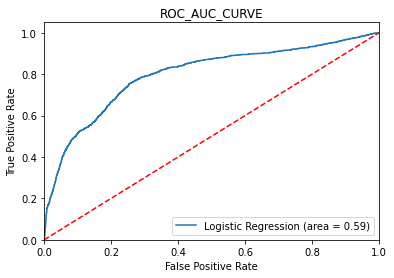

In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ytest, logreg.predict(xtest))
fpr, tpr, thresholds = roc_curve(ytest, logreg.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC_CURVE')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Using GridSearchCV to get the best model parameters:

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
params = [
            {
                "penalty" : ['l2'], 
                "C" : [0.1,0.001,0.0001,10,100,0.002,1000], 
                "solver" : ["lbfgs","sag","saga"], 
               
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.1,0.001,0.0001,10,100,0.002,1000], 
                "solver" : ["lbfgs","sag","saga"], 
                
            }
]
logreg_grid = GridSearchCV(estimator = LogisticRegression(n_jobs=-1 ), param_grid = params, scoring = "f1",n_jobs=-1)
logreg_grid.fit(xtrain, ytrain)

GridSearchCV(estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.001, 0.0001, 10, 100, 0.002, 1000],
                          'penalty': ['l2'],
                          'solver': ['lbfgs', 'sag', 'saga']},
                         {'C': [0.1, 0.001, 0.0001, 10, 100, 0.002, 1000],
                          'penalty': ['l1'],
                          'solver': ['lbfgs', 'sag', 'saga']}],
             scoring='f1')

In [88]:
logreg_grid.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

In [89]:
logreg_grid.best_score_

0.32877695136081886

In [90]:
y_pred = logreg_grid.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9852
           1       0.58      0.21      0.30      1274

    accuracy                           0.89     11126
   macro avg       0.74      0.59      0.62     11126
weighted avg       0.87      0.89      0.87     11126



In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest, y_pred)
print(confusion_matrix)

[[9662  190]
 [1012  262]]


### Building model with best parameters:

In [92]:
clf= LogisticRegression(C= 10,penalty="l2",solver="lbfgs",max_iter=100)

clf.fit(xtrain,ytrain)

LogisticRegression(C=10)

In [93]:
y_pred = clf.predict(xtest)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(clf.score(xtest, ytest)))

Accuracy of logistic regression classifier on test set: 0.89196


In [94]:
y_pred = clf.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9852
           1       0.58      0.21      0.30      1274

    accuracy                           0.89     11126
   macro avg       0.74      0.59      0.62     11126
weighted avg       0.87      0.89      0.87     11126



###### We see that accuracy increases a bit

In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest, y_pred)
print(confusion_matrix)

[[9662  190]
 [1012  262]]


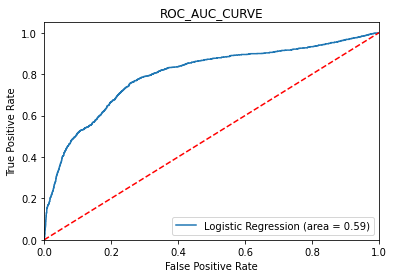

In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ytest, clf.predict(xtest))
fpr, tpr, thresholds = roc_curve(ytest, clf.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC_CURVE')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Note:
    We know this is an imbalanced dataset so we need to oversample and undersample the data and check the models performance

#### Over-sampling and under-sampling the data and building models on it.

#### Under-sampling:

In [101]:

from collections import Counter
from imblearn.under_sampling import NearMiss

nms=NearMiss()
x2,y2=nms.fit_resample(xtrain,ytrain.ravel())
print('Number of rows before undersampling:{}'.format(Counter(ytrain)))
print('Number of rows after undersampling: {}'.format(Counter(y2)))

Number of rows before undersampling:Counter({0: 23024, 1: 2934})
Number of rows after undersampling: Counter({0: 2934, 1: 2934})


In [102]:
logreg_uf1=LogisticRegression()
logreg_uf1.fit(x2,y2)
logreg_uf1.score(x2,y2)
y_pred = logreg_uf1.predict(x2)

In [103]:
metrics.roc_auc_score(y2, logreg_uf1.predict(x2))

0.7958418541240627

In [104]:

print(classification_report(y2, logreg_uf1.predict(x2)))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      2934
           1       0.84      0.73      0.78      2934

    accuracy                           0.80      5868
   macro avg       0.80      0.80      0.80      5868
weighted avg       0.80      0.80      0.80      5868



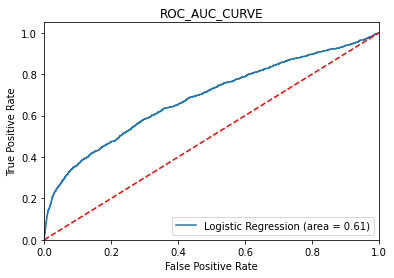

In [105]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ytest, logreg_uf1.predict(xtest))
fpr, tpr, thresholds = roc_curve(ytest, logreg_uf1.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC_CURVE')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [106]:
params = [
            {
                "penalty" : ['l2'], 
                "C" :[0.1,0.001,0.0001,10,100,0.002,1000], 
                "solver" : ["lbfgs","sag","saga"],
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.1,0.001,0.0001,10,100,0.002,1000], 
                "solver" : ["lbfgs","sag","saga"], 
            }
]
clf = GridSearchCV(estimator = LogisticRegression(n_jobs=-1 ), param_grid = params, scoring = "f1",n_jobs=-1)
clf.fit(x2, y2)

GridSearchCV(estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.001, 0.0001, 10, 100, 0.002, 1000],
                          'penalty': ['l2'],
                          'solver': ['lbfgs', 'sag', 'saga']},
                         {'C': [0.1, 0.001, 0.0001, 10, 100, 0.002, 1000],
                          'penalty': ['l1'],
                          'solver': ['lbfgs', 'sag', 'saga']}],
             scoring='f1')

In [107]:
clf.best_estimator_

LogisticRegression(C=10, n_jobs=-1, solver='saga')

In [108]:
clf.best_score_

0.7779479802822749

In [109]:
clf.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'saga'}

In [110]:
logreg_uf2=LogisticRegression(**clf.best_params_)
logreg_uf2.fit(x2,y2)
logreg_uf2.score(x2,y2)


0.7960122699386503

In [111]:
print(classification_report(y2, logreg_uf2.predict(x2)))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      2934
           1       0.84      0.73      0.78      2934

    accuracy                           0.80      5868
   macro avg       0.80      0.80      0.80      5868
weighted avg       0.80      0.80      0.80      5868



##### we see that using the best params we get a higher score for under-sampled data.
    And also the f1 scores increase from the rest of the above models.

#### Oversampling:

In [112]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x1,y1=smt.fit_resample(xtrain,ytrain.ravel())

In [113]:
print('Number of rows before oversampling:{}'.format(Counter(ytrain)))
print('Number of rows after oversampling: {}'.format(Counter(y1)))

Number of rows before oversampling:Counter({0: 23024, 1: 2934})
Number of rows after oversampling: Counter({0: 23024, 1: 23024})


In [114]:
logreg_of1=LogisticRegression()
logreg_of1.fit(x1,y1)
logreg_of1.score(x1,y1)


0.762791000694927

In [115]:
y_pred = logreg_of1.predict(x1)

In [116]:
metrics.roc_auc_score(y1, logreg_of1.predict(x1))

0.762791000694927

In [117]:

print(classification_report(y1, logreg_of1.predict(x1)))

              precision    recall  f1-score   support

           0       0.74      0.82      0.77     23024
           1       0.79      0.71      0.75     23024

    accuracy                           0.76     46048
   macro avg       0.77      0.76      0.76     46048
weighted avg       0.77      0.76      0.76     46048



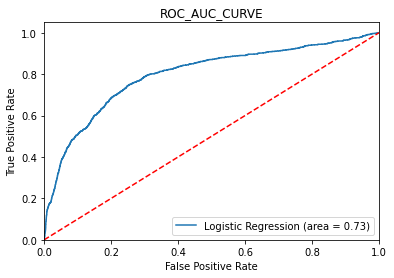

In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ytest, logreg_of1.predict(xtest))
fpr, tpr, thresholds = roc_curve(ytest, logreg_of1.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC_CURVE')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [119]:
params = [
            {
                "penalty" : ['l2'], 
                "C" :[0.1,0.001,0.0001,10,100,0.002,1000], 
                "solver" : ["lbfgs","sag","saga"],
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.1,0.001,0.0001,10,100,0.002,1000], 
                "solver" : ["lbfgs","sag","saga"], 
            }
]
clf = GridSearchCV(estimator = LogisticRegression( n_jobs=-1),n_jobs=-1, param_grid = params, scoring = "f1")
clf.fit(x1, y1)

GridSearchCV(estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.001, 0.0001, 10, 100, 0.002, 1000],
                          'penalty': ['l2'],
                          'solver': ['lbfgs', 'sag', 'saga']},
                         {'C': [0.1, 0.001, 0.0001, 10, 100, 0.002, 1000],
                          'penalty': ['l1'],
                          'solver': ['lbfgs', 'sag', 'saga']}],
             scoring='f1')

In [120]:
clf.best_estimator_

LogisticRegression(C=10, n_jobs=-1, solver='sag')

In [121]:
clf.best_score_

0.7486253518853083

In [122]:
logreg_of2=LogisticRegression(**clf.best_params_)
logreg_of2.fit(x1,y1)
logreg_of2.score(x1,y1)

0.762856150104239

In [123]:
print(classification_report(y1, logreg_of2.predict(x1)))

              precision    recall  f1-score   support

           0       0.74      0.82      0.77     23024
           1       0.79      0.71      0.75     23024

    accuracy                           0.76     46048
   macro avg       0.77      0.76      0.76     46048
weighted avg       0.77      0.76      0.76     46048



#### Here also we see that taking the best params in the model increases the f1 scores by a small amount

## Conclusion:

Accuracy is not so good for oversampled and undersampled data but the f1 scores are good.